# Tutorial on Arinyo model

In this notebook, we reconstruct P1D and P3D from the best-fitting parameters of the Arinyo model

In [1]:
# %load first_cell.py
%load_ext autoreload
%autoreload 2
%matplotlib notebook

#import black
#import jupyter_black

#jupyter_black.load(
#    lab=False,
#    line_length=79,
#    verbosity="DEBUG",
#    target_version=black.TargetVersion.PY310,
#)

import numpy as np
import os
import sys
import matplotlib.pyplot as plt

from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=67.26, Om0=0.314, Ob0=0.049)

from matplotlib import rcParams
rcParams["mathtext.fontset"] = "stix"
rcParams["font.family"] = "STIXGeneral"


def print_shape(*args):
    nelem = len(args)
    for ii in range(nelem - 1):
        print(args[ii].shape, end=" ")
    print(args[nelem - 1].shape)


def ls_level(folder, nlevels):
    for ii in range(nlevels):
        folder = os.path.dirname(folder)
    folder += "/"
    return folder


path_program = ls_level(os.getcwd(), 1)
print(path_program)
sys.path.append(path_program)

/nfs/pic.es/user/l/lcabayol/DESI/lya_pk/


In [6]:
import os
env_var = os.environ
os.environ["LACE_REPO"] = "/nfs/pic.es/user/l/lcabayol/DESI/LaCE"
os.environ["LACE_MANAGER_REPO"] = "/nfs/pic.es/user/l/lcabayol/DESI/LaCE_manager"
os.environ["lya_pk_REPO"] = "/nfs/pic.es/user/l/lcabayol/DESI/lya_pk"

In [7]:
from corner import corner

from lace.emulator import pd_archive
from lya_pk.input_emu import data_for_emu

ImportError: cannot import name 'data_for_emu' from 'lya_pk.input_emu' (/nfs/pic.es/user/l/lcabayol/DESI/lya_pk/lya_pk/input_emu.py)

In [3]:
# folder best fits
folder_best_fits = (
    "/home/jchaves/Proyectos/projects/lya/data/pkfits/p3d_fits_new/"
)

# load errors
folder = path_program + "data/"
err_p1d = np.load(folder + "p1d_4_fit.npz")
err_p3d = np.load(folder + "p3d_4_fit.npz")

# load archive
archive = pd_archive.archivePD(nsamples=30)
archive.average_over_samples(flag="all")

In [4]:
data_emu = data_for_emu(
    folder_best_fits,
    archive.data_av_all,
    err_p3d,
    err_p1d,
)

TypeError: float() argument must be a string or a number, not 'dict'

In [ ]:
[0]

In [69]:
file = "/home/jchaves/Proyectos/projects/lya/data/pkfits/p3d_fits/fit_indsim_0_kmax3d_5_noise3d_0.075_kmax1d_5_noise1d_0.01.npy.npz"
fil = np.load(file)
fil.files

['chain', 'lnprob', 'chi2', 'best_params']

In [96]:
fil["chain"].shape

(232000, 8)

In [94]:
uni, ind_uni = np.unique(np.array([0, 0, 10, 12, 12, 13]), return_index=True)

(array([ 0, 10, 12, 13]), array([0, 2, 3, 5]))

#### get best fit and errors

In [89]:
best = fil["best_params"]
like = np.argsort(np.unique(fil['lnprob']))[::-1]
err = np.percentile(fil["chain"], [16, 84], axis=0)
print(best)
print(err)

[-0.69507956  0.32664311  1.29447897  2.03056964  0.6590092   1.99635437
 16.4315539   0.49395618]
[[-0.77054417  0.16261002  0.30325567  1.23888347  0.35321776  0.85049264
  13.29930648  0.26633016]
 [-0.60033363  0.62514223  1.81283971  3.14323466  0.97561664  2.4312137
  30.51287496  2.10030925]]


In [134]:
_, ind = np.unique(fil["lnprob"], return_index=True)

In [140]:
ind.shape

(30956,)

In [136]:
fil["chain"].shape

(232000, 8)

<IPython.core.display.Javascript object>


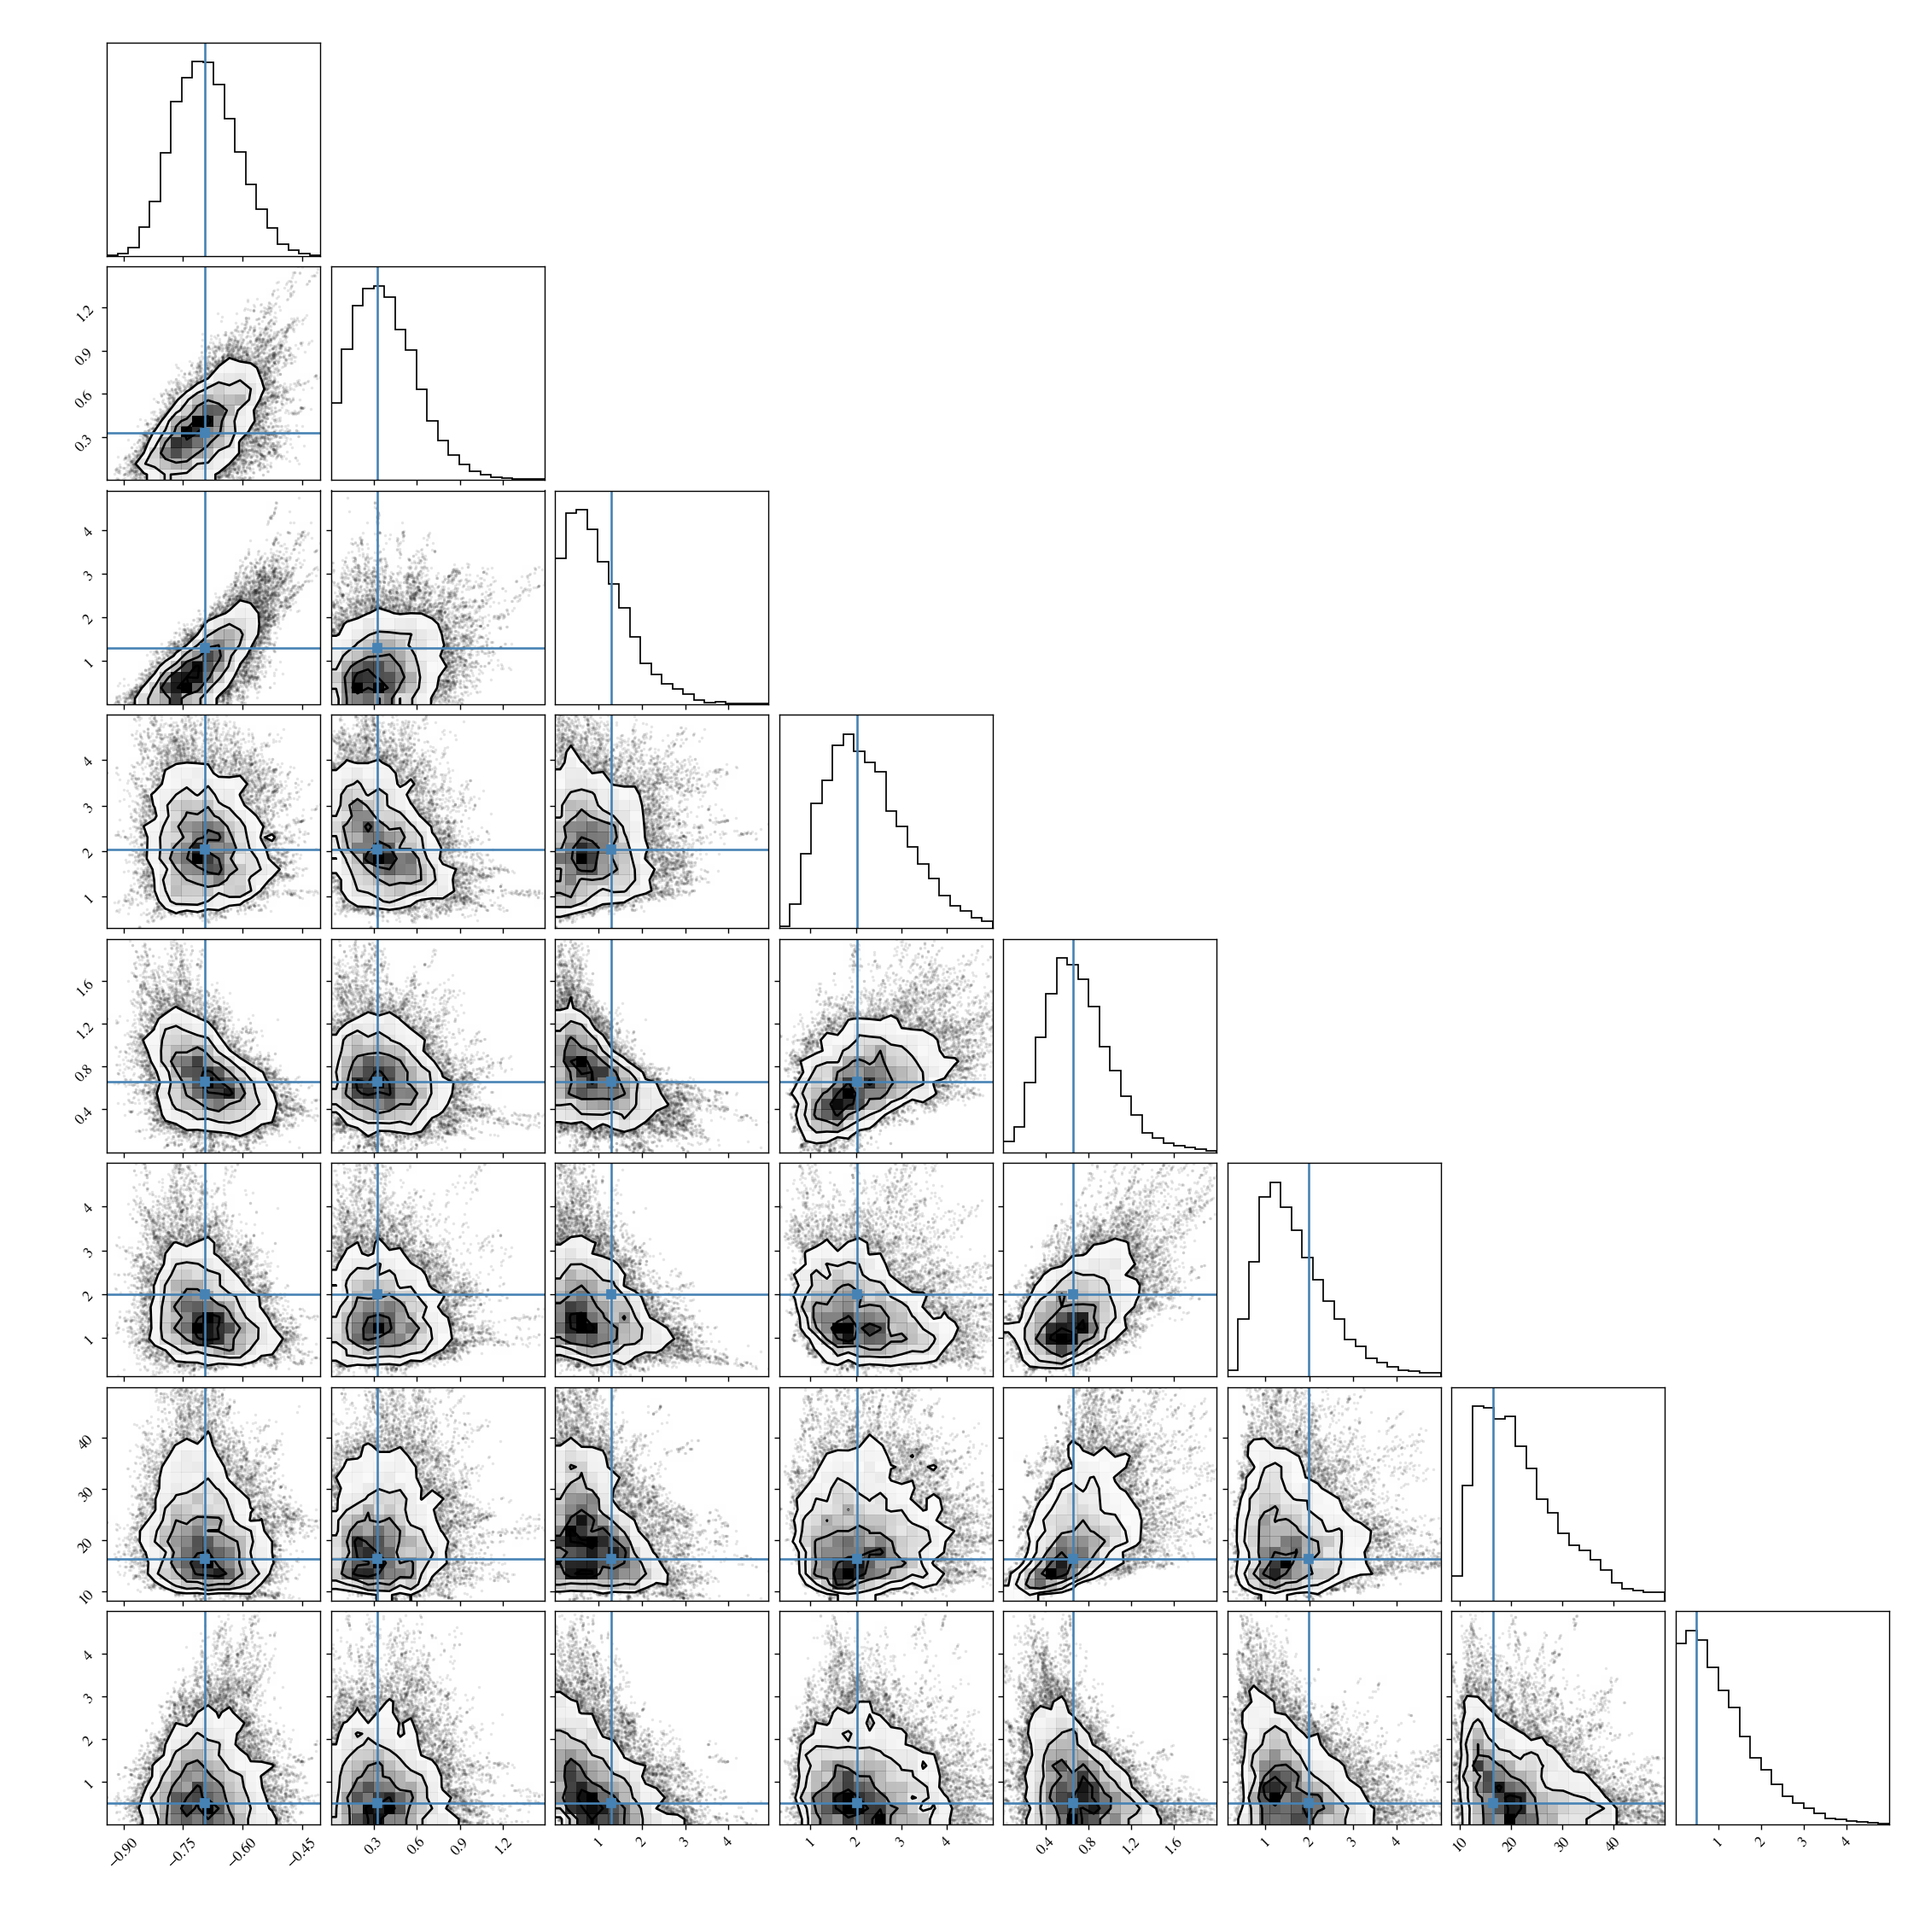

In [139]:
corner(fil["chain"][ind, :], truths=fil["best_params"]);
# corner(fil["chain"][:, :], truths=fil["best_params"]);

In [19]:
file = path_program + "data/input_emu.npz"
fall = np.load(file)
fall.files

['bests', 'means', 'stds', 'corrs']

In [97]:
fall["corrs"].shape

(1023, 28)

In [22]:
len(archive.data_av_all)

1650

In [48]:
ind_book = 11

In [65]:
archive.data_av_all[ind_sim]["scale_tau"]

0.9

In [101]:
from lya_pk.fit_p3d import purge_chains

In [146]:
len(best_fit_params.keys())

8

In [124]:
k3d_max = 5
k1d_max = 5
fit = fit_p3d.FitPk(
    data_dict,
    model,
    fit_type="both",
    k3d_max=k3d_max,
    k1d_max=k1d_max,
)
# fit.ind_fit1d = np.argwhere(fit.data["k1d"] < kmax_p1d)[:, 0]

#### for each sample

In [ ]:
get dictionary

# input params
data_dict["emu_params"]

# best-fitting params (1-sigma-chain)
load

# loss
fit.get_chi2(best_fit_params)



1.960590094328929

In [52]:
fall.files

['bests', 'means', 'stds', 'corrs']

In [53]:
fall["bests"][0]

array([ 0.71627191,  0.31171356,  0.89345596,  2.00301771,  0.62450456,
        1.95548752, 16.03792277,  1.17304493])

In [55]:
best_fit_params = fit2params(fall["bests"][0])


#### Important!

In [56]:
fit.ind_fit1d

AttributeError: 'FitPk' object has no attribute 'ind_fit1d'

In [119]:
fit.get_chi2(best_fit_params)

2.1543040253681496

In [118]:
def fit2params(pars):
    dic = {
        "bias": pars[0],
        "beta": pars[1],
        "d1_q1": pars[2],
        "d1_kvav": pars[3],
        "d1_av": pars[4],
        "d1_bv": pars[5],
        "d1_kp": pars[6],
        "d1_q2": pars[7],
    }
    return dic

def eval_loss(best_fit_params, data_dict):
    
    # target p3d
    targ_p3d = data_dict['p3d']    
    # err p3d
    std_p3d = data_dict['std_p3d']
    std_p3d[~fit.ind_fit3d] = np.inf
    # predict p3d
    pred_p3d = fit.get_model_3d(
        parameters=best_fit_params,
    )
    p3d_all = np.zeros_like(fit.data["p3d"])
    p3d_all[fit.ind_fit3d] = res_p3d
    
    # target p1d
    targ_p1d = data_dict['p1d']
    # err p3d
    std_p1d = data_dict['std_p1d']
    std_p1d[~fit.ind_fit1d] = np.inf
    # predict p1d
    pred_p1d = fit.get_model_1d(
        parameters=best_fit_params,
    )
    
    res = np.sum(p3d_all)

In [59]:
archive.data_av_all[ind_sim].keys()

dict_keys(['ind_sim', 'ind_tau', 'ind_z', 'ind_phase', 'ind_axis', 'Delta2_p', 'n_p', 'alpha_p', 'f_p', 'z', 'scale_tau', 'scale_T0', 'scale_gamma', 'mF', 'T0', 'gamma', 'sigT_Mpc', 'kF_Mpc', 'k_Mpc', 'p1d_Mpc', 'k3_Mpc', 'mu3', 'p3d_Mpc'])

<IPython.core.display.Javascript object>


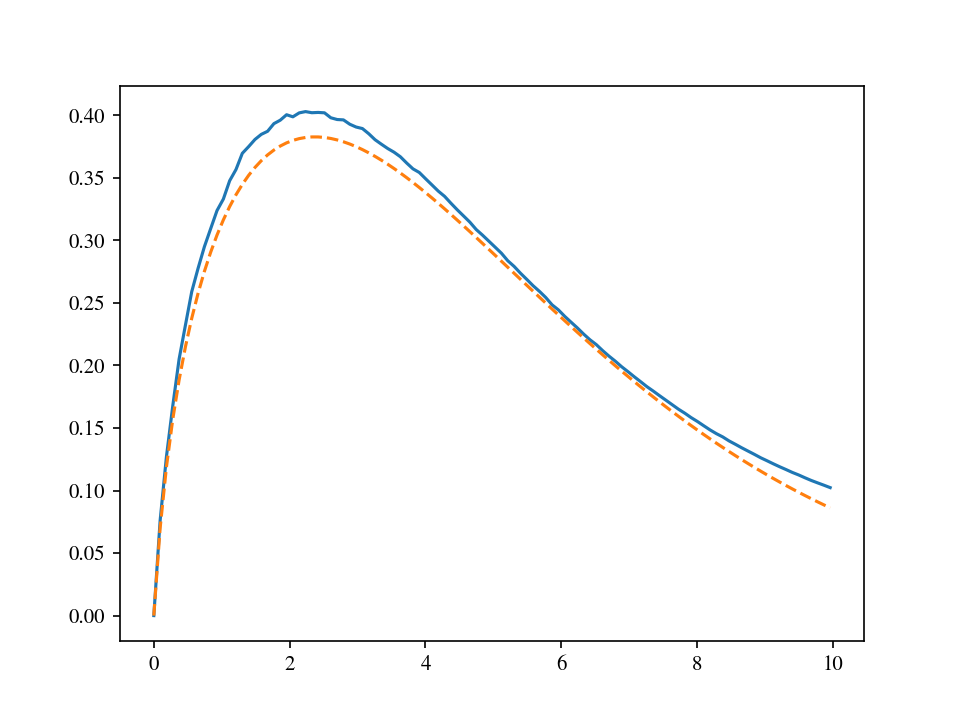

In [60]:
plt.plot(data_dict["k1d"][fit.ind_fit1d], data_dict["p1d"][fit.ind_fit1d])
plt.plot(fit.data["k1d"][fit.ind_fit1d], res_p1d, "--")

<IPython.core.display.Javascript object>


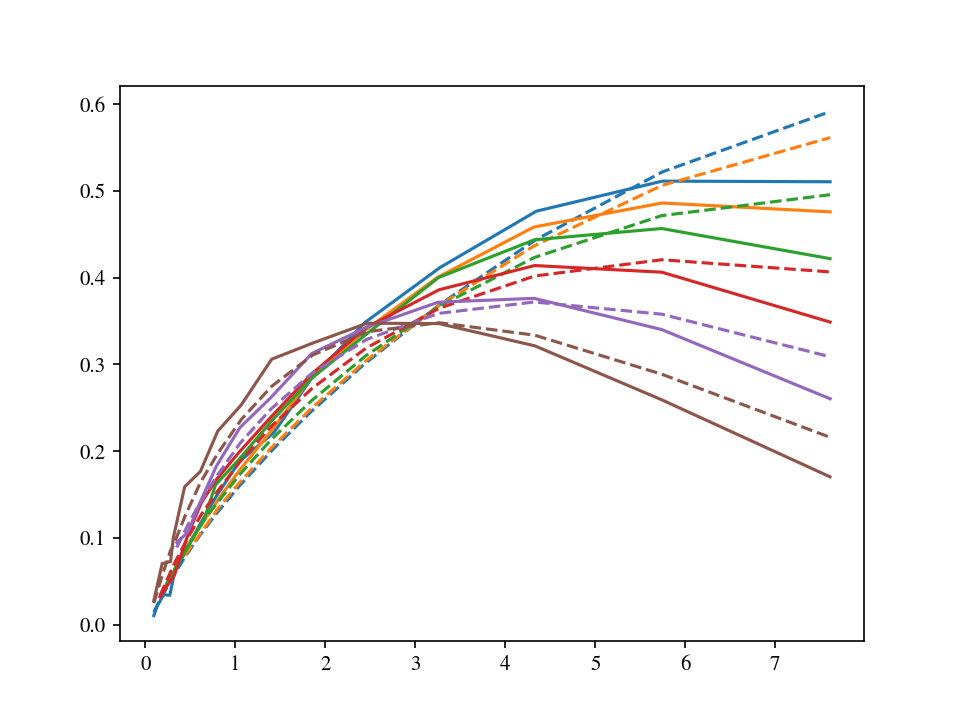

In [61]:
ii0 = 0
for ii in range(0, 16, 3):
    col = "C" + str(ii0)
    mask = fit.ind_fit3d[:, ii]
    plt.plot(data_dict["k3d"][mask, ii], data_dict["p3d"][mask, ii], col)
    plt.plot(fit.data["k3d"][mask, ii], p3d_all[mask, ii], col + "--")
    ii0 += 1

<IPython.core.display.Javascript object>


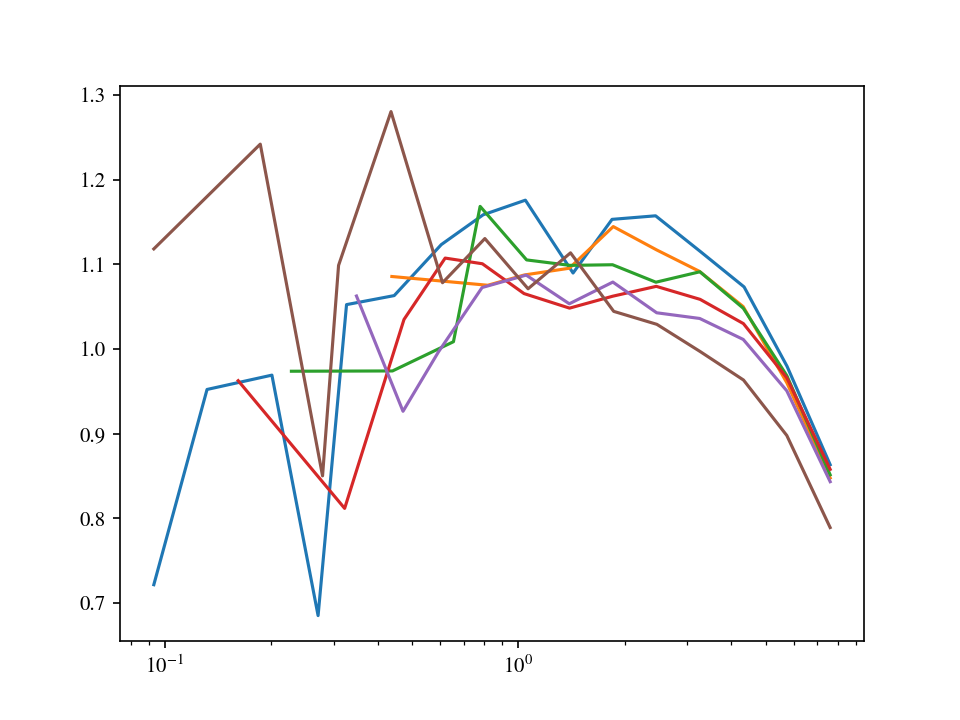

In [62]:
ii0 = 0
for ii in range(0, 16, 3):
    col = "C" + str(ii0)
    mask = fit.ind_fit3d[:, ii]
    plt.plot(
        data_dict["k3d"][mask, ii],
        data_dict["p3d"][mask, ii] / p3d_all[mask, ii],
        col,
    )
    ii0 += 1
plt.xscale("log")